This dataset was generated with a motive to build pre-dictive epilepsy diagnosis model and publically avail-able since 2020. It was generated on a similar acqui-sition and settings i.e., sampling frequency, bandpassﬁltering and number of signals and time duration asof University of Bonn. It has overcome the limitationsfaced by University of Bonn dataset such as diﬀerentEEG recording (inter-cranial and scalp) for healthy andepileptic patients [11]. All the data were taken exclu-sively using surface EEG electrodes for 15 healthy andepileptic patients.

Reference : https://www.researchgate.net/publication/353654102_Open_and_free_EEG_datasets_for_epilepsy_diagnosis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk(r'C:\Users\sivaka\Downloads\School\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\sivaka\Downloads\School\input\E1_13.txt
C:\Users\sivaka\Downloads\School\input\E1_14.txt
C:\Users\sivaka\Downloads\School\input\E1_15.txt
C:\Users\sivaka\Downloads\School\input\E1_17.txt
C:\Users\sivaka\Downloads\School\input\E1_18.txt
C:\Users\sivaka\Downloads\School\input\E1_19.txt
C:\Users\sivaka\Downloads\School\input\E1_20.txt
C:\Users\sivaka\Downloads\School\input\E1_3.txt
C:\Users\sivaka\Downloads\School\input\E1_4.txt
C:\Users\sivaka\Downloads\School\input\E1_5.txt
C:\Users\sivaka\Downloads\School\input\E1_6.txt
C:\Users\sivaka\Downloads\School\input\E1_7.txt
C:\Users\sivaka\Downloads\School\input\E1_8.txt
C:\Users\sivaka\Downloads\School\input\E1_9.txt
C:\Users\sivaka\Downloads\School\input\E2_1.txt
C:\Users\sivaka\Downloads\School\input\E2_10.txt
C:\Users\sivaka\Downloads\School\input\E2_11.txt
C:\Users\sivaka\Downloads\School\input\E2_12.txt
C:\Users\sivaka\Downloads\School\input\E2_13.txt
C:\Users\sivaka\Downloads\School\input\E2_14 (1).txt
C:\Users\sivaka\Download

In [ ]:
import os

for dirname, _, filenames in os.walk(r'C:\Users\sivaka\Downloads\School\input\dataset'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()[:10]  # read the first 10 lines
            for line in lines:
                print(line)

8.61

4.38

-5.18

-13.98

-19.05

-22.82

-27.73

-32.13

-33.03

-30.81

-11.27

-8.06

0.31

7.62

11.25

12.91

13.31

10.70

5.50

2.04

57.66

78.24

82.39

79.78

77.54

72.82

62.76

52.06

46.70

46.81

-0.39

5.36

14.33

22.02

24.70

22.64

18.93

15.78

13.12

10.75

4.14

9.29

14.53

18.88

22.42

24.78

24.42

20.24

13.65

8.28

13.23

23.39

15.94

-3.41

-22.14

-32.35

-35.72

-38.32

-43.34

-49.47

14.52

11.63

8.49

5.38

1.93

-1.83

-5.31

-8.90

-14.66

-23.86

-2.54

-1.37

-0.17

0.88

2.68

5.34

7.93

9.01

7.01

1.44

-11.57

-23.96

-30.75

-30.32

-25.99

-22.37

-20.28

-16.90

-10.16

-0.96

-3.74

-12.42

-14.37

-8.46

1.41

8.46

8.62

3.94

0.36

2.21

14.65

16.91

12.89

4.26

-5.68

-13.41

-17.19

-18.49

-21.16

-28.08

-0.76

-7.04

-15.11

-22.48

-29.68

-38.27

-46.38

-49.10

-44.23

-35.84

0.87

2.00

2.40

1.65

-0.52

-3.32

-5.12

-5.36

-5.81

-9.17

-2.61

-10.09

-17.15

-20.51

-20.83

-20.50

-19.70

-16.54

-10.67

-5.07

-1.

In [ ]:
import os
import pandas as pd

data = []

for dirname, _, filenames in os.walk(r'C:\Users\sivaka\Downloads\School\input\dataset'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()[:10]  # read the first 10 lines
            for line in lines:
                data.append([filename, line.strip()])  # add the filename and line to the data list

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['FileName', 'Value'])

# Display the DataFrame
print(df)

           FileName   Value
0         E10_1.txt    8.61
1         E10_1.txt    4.38
2         E10_1.txt   -5.18
3         E10_1.txt  -13.98
4         E10_1.txt  -19.05
...             ...     ...
7995  TrainH5_9.txt   22.51
7996  TrainH5_9.txt   23.05
7997  TrainH5_9.txt   22.71
7998  TrainH5_9.txt   22.92
7999  TrainH5_9.txt   21.91

[8000 rows x 2 columns]


# EDA operations to check for data quality

In [ ]:


# Check for Missing values
print(df.isnull().sum())

#Check for duplicate values
print(df.duplicated().sum())

# #Check for Data Types
print(df.dtypes)

# #Summary Statistics
print(df.describe(include='all'))

# Check for Unique values
df['FileNames'] = df['FileName'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
df['Values'] = df['Value'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
duplicates = df.duplicated(subset=['FileNames', 'Values'], keep=False)
print(duplicates.sum())

# #Check for Constant columns
print(df.nunique())

FileName    0
Value       0
dtype: int64
10
FileName    object
Value       object
dtype: object
         FileName  Value
count        8000   8000
unique        800   5428
top     E10_1.txt  21.30
freq           10      7
20
FileName      800
Value        5428
FileNames     800
Values       5428
dtype: int64


In [ ]:
import os
import pandas as pd

data = []

for dirname, _, filenames in os.walk(r'C:\Users\sivaka\Downloads\School\input\dataset'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()[:10]  # read the first 10 lines
            for line in lines:
                data.append([filename, line.strip()])  # add the filename and line to the data list

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['FileName', 'Value'])

# Remove everything after the underscore from the 'FileName' column
df['FileName'] = df['FileName'].str.split('_').str[0]

# Display the DataFrame
print(df)

     FileName   Value
0         E10    8.61
1         E10    4.38
2         E10   -5.18
3         E10  -13.98
4         E10  -19.05
...       ...     ...
7995  TrainH5   22.51
7996  TrainH5   23.05
7997  TrainH5   22.71
7998  TrainH5   22.92
7999  TrainH5   21.91

[8000 rows x 2 columns]


In [ ]:
# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H', })

# Print 'Target' and 'Value' side by side
for index, row in df[['Target', 'Value']].iterrows():
    print(f"Target: {row['Target']}, Value: {row['Value']}")


# Create a new DataFrame 'data' with 'FileName' and 'Value' columns
data = df[['FileName', 'Value']]

# Print the new DataFrame
print(data.show100())


Target: E, Value: 8.61
Target: E, Value: 4.38
Target: E, Value: -5.18
Target: E, Value: -13.98
Target: E, Value: -19.05
Target: E, Value: -22.82
Target: E, Value: -27.73
Target: E, Value: -32.13
Target: E, Value: -33.03
Target: E, Value: -30.81
Target: E, Value: -11.27
Target: E, Value: -8.06
Target: E, Value: 0.31
Target: E, Value: 7.62
Target: E, Value: 11.25
Target: E, Value: 12.91
Target: E, Value: 13.31
Target: E, Value: 10.7
Target: E, Value: 5.5
Target: E, Value: 2.04
Target: E, Value: 57.66
Target: E, Value: 78.24
Target: E, Value: 82.39
Target: E, Value: 79.78
Target: E, Value: 77.54
Target: E, Value: 72.82
Target: E, Value: 62.76
Target: E, Value: 52.06
Target: E, Value: 46.7
Target: E, Value: 46.81
Target: E, Value: -0.39
Target: E, Value: 5.36
Target: E, Value: 14.33
Target: E, Value: 22.02
Target: E, Value: 24.7
Target: E, Value: 22.64
Target: E, Value: 18.93
Target: E, Value: 15.78
Target: E, Value: 13.12
Target: E, Value: 10.75
Target: E, Value: 4.14
Target: E, Value: 9.

AttributeError: 'DataFrame' object has no attribute 'show100'

Target: E, Value: 8.61
Target: E, Value: 4.38
Target: E, Value: -5.18
Target: E, Value: -13.98
Target: E, Value: -19.05
Target: E, Value: -22.82
Target: E, Value: -27.73
Target: E, Value: -32.13
Target: E, Value: -33.03
Target: E, Value: -30.81
Target: E, Value: -11.27
Target: E, Value: -8.06
Target: E, Value: 0.31
Target: E, Value: 7.62
Target: E, Value: 11.25
Target: E, Value: 12.91
Target: E, Value: 13.31
Target: E, Value: 10.7
Target: E, Value: 5.5
Target: E, Value: 2.04
Target: E, Value: 57.66
Target: E, Value: 78.24
Target: E, Value: 82.39
Target: E, Value: 79.78
Target: E, Value: 77.54
Target: E, Value: 72.82
Target: E, Value: 62.76
Target: E, Value: 52.06
Target: E, Value: 46.7
Target: E, Value: 46.81
Target: E, Value: -0.39
Target: E, Value: 5.36
Target: E, Value: 14.33
Target: E, Value: 22.02
Target: E, Value: 24.7
Target: E, Value: 22.64
Target: E, Value: 18.93
Target: E, Value: 15.78
Target: E, Value: 13.12
Target: E, Value: 10.75
Target: E, Value: 4.14
Target: E, Value: 9.

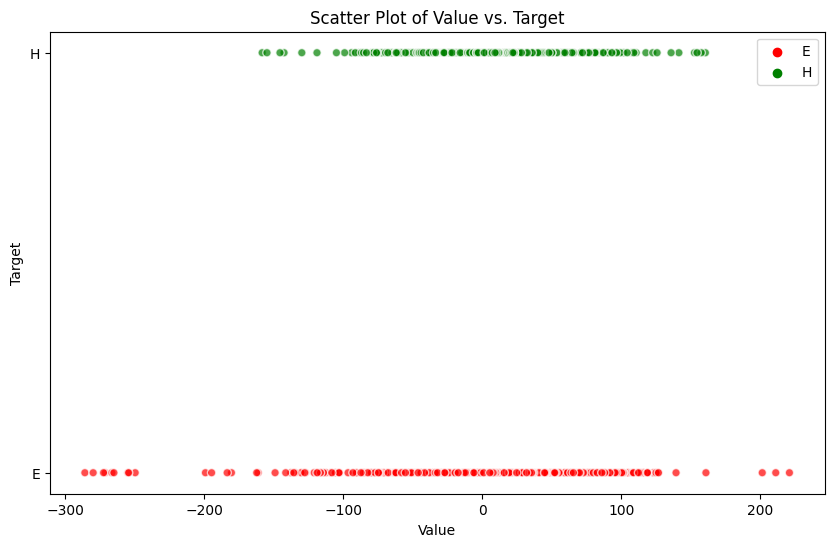

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration

df_plot = pd.DataFrame(data)

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df_plot['Value'] = pd.to_numeric(df_plot['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df_plot['Target'] = df_plot['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df_plot['Target'] = df_plot['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Print 'Target' and 'Value' side by side
for index, row in df_plot[['Target', 'Value']].iterrows():
    print(f"Target: {row['Target']}, Value: {row['Value']}")

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
colors = {'E': 'red', 'H': 'green'}
plt.scatter(df_plot['Value'], df_plot['Target'], c= df_plot['Target'].map(colors), alpha=0.7, edgecolors='w')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Target')
plt.title('Scatter Plot of Value vs. Target')

# Adding a legend
for target, color in colors.items():
    plt.scatter([], [], color=color, label=target)

plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Define the dictionary
data = {'FileName': ['TrainE1', 'TrainE2', 'TrainH1', 'TrainH2', 'TrainE3', 'TrainH3'],
        'Value': [8.61, 4.38, -5.18, -13.98, -19.05, 22.51]}

# Create the DataFrame
df_data = pd.DataFrame(data)

print(df_data)

# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Defining features and target
X = features.drop(['FileName', 'Target'], axis=1)
y = features['Target']

# Creating the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store each fold's accuracy
accuracies = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating and training the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Print classification report for each fold
    print(f"Classification report for fold {len(accuracies)}:")
    print(classification_report(y_test, predictions))

# Print the accuracy of each fold
for i, accuracy in enumerate(accuracies, 1):
    print(f"Accuracy of fold {i}: {accuracy}")

# Print the average accuracy
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")

Classification report for fold 1:
              precision    recall  f1-score   support

           E       0.00      0.00      0.00         3
           H       0.40      0.67      0.50         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

Classification report for fold 2:
              precision    recall  f1-score   support

           E       0.25      0.33      0.29         3
           H       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6

Classification report for fold 3:
              precision    recall  f1-score   support

           E       1.00      0.75      0.86         4
           H       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83   

Accuracy: 0.3333333333333333
AUC: 0.4444444444444444


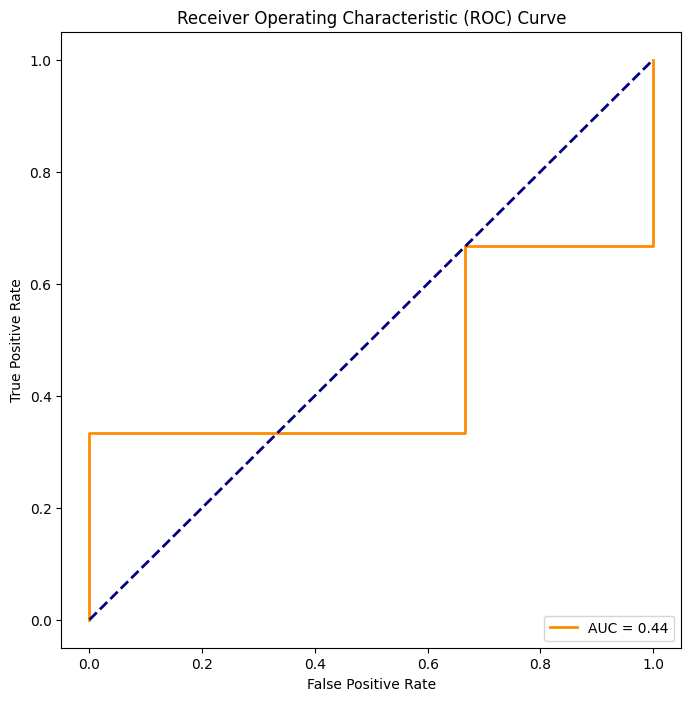

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Convert class labels to numeric values
label_encoder = LabelEncoder()
features['Target'] = label_encoder.fit_transform(features['Target'])

# Splitting data into train and test sets
train_data, test_data = train_test_split(features, test_size=0.2, random_state=42)

# Defining features and target for training set
X_train = train_data.drop(['FileName', 'Target'], axis=1)
y_train = train_data['Target']

# Defining features and target for test set
X_test = test_data.drop(['FileName', 'Target'], axis=1)
y_test = test_data['Target']

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression()

# Remove rows with NaN values in the target variable
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Fill NaN values with the mean of the target variable
y_train = np.nan_to_num(y_train, nan=np.mean(y_train))

# Perform 5-Fold Cross Validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean cross-validated score:", scores.mean())

Cross-validated scores: [0.2 0.8 0.4 0.8 0.5]
Mean cross-validated score: 0.54


# SVC

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Defining features and target
X = features.drop(['FileName', 'Target'], axis=1)
y = features['Target']

# Encoding the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Creating the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store each fold's accuracy and AUC
accuracies = []
aucs = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Creating and training the SVC model
    svcmodel = SVC(probability=True)
    svcmodel.fit(X_train, y_train)

    # Predictions on the test set
    predictions = svcmodel.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Compute the AUC and add it to the list of AUCs
    auc = roc_auc_score(y_test, svcmodel.predict_proba(X_test)[:, 1])
    aucs.append(auc)

# Print the accuracy and AUC of each fold
for i, (accuracy, auc) in enumerate(zip(accuracies, aucs), 1):
    print(f"Accuracy of fold {i}: {accuracy}")
    print(f"AUC of fold {i}: {auc}")

# Print the average accuracy and AUC
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average AUC: {sum(aucs) / len(aucs)}")

Accuracy of fold 1: 0.6666666666666666
AUC of fold 1: 0.5555555555555556
Accuracy of fold 2: 0.6666666666666666
AUC of fold 2: 0.3333333333333333
Accuracy of fold 3: 0.6666666666666666
AUC of fold 3: 0.0
Accuracy of fold 4: 0.5
AUC of fold 4: 0.5
Accuracy of fold 5: 0.5
AUC of fold 5: 0.33333333333333337
Average accuracy: 0.6
Average AUC: 0.34444444444444444


# RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Defining features and target
X = features.drop(['FileName', 'Target'], axis=1)
y = features['Target']

# Creating the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store each fold's accuracy and AUC
accuracies = []
aucs = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating and training the RandomForestClassifier model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Compute the AUC and add it to the list of AUCs
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')
    aucs.append(auc)

# Print the accuracy and AUC of each fold
for i, (accuracy, auc) in enumerate(zip(accuracies, aucs), 1):
    print(f"Accuracy of fold {i}: {accuracy}")
    print(f"AUC of fold {i}: {auc}")

# Print the average accuracy and AUC
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average AUC: {sum(aucs) / len(aucs)}")

Accuracy of fold 1: 0.8333333333333334
AUC of fold 1: 0.7777777777777778
Accuracy of fold 2: 0.8333333333333334
AUC of fold 2: 0.6666666666666666
Accuracy of fold 3: 0.8333333333333334
AUC of fold 3: 0.875
Accuracy of fold 4: 0.5
AUC of fold 4: 0.625
Accuracy of fold 5: 0.5
AUC of fold 5: 0.7777777777777778
Average accuracy: 0.7
Average AUC: 0.7444444444444445


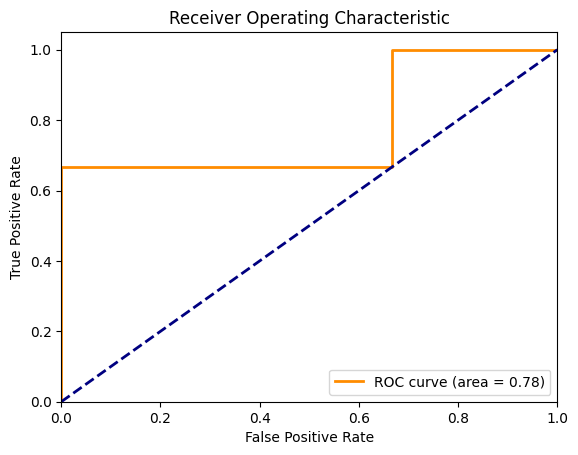

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming the last trained model and test set are being used
# Compute the probabilities of the positive class
probs = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, probs, pos_label=model.classes_[1])

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ensemble of 3 models : Logistic Regression , SVM and a Random Forest Models

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Defining features and target
X = features.drop(['FileName', 'Target'], axis=1)
y = features['Target']

# Creating the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store each fold's accuracy and AUC
accuracies = []
aucs = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating individual models
    svm_model = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    lr_model = LogisticRegression()

    # Creating a Voting Classifier
    ensemble_model = VotingClassifier(estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('lr', lr_model)
    ], voting='soft')

    # Training the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = ensemble_model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Compute the AUC and add it to the list of AUCs
    auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1], multi_class='ovr')
    aucs.append(auc)

# Print the accuracy and AUC of each fold
for i, (accuracy, auc) in enumerate(zip(accuracies, aucs), 1):
    print(f"Accuracy of fold {i}: {accuracy}")
    print(f"AUC of fold {i}: {auc}")

# Print the average accuracy and AUC
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average AUC: {sum(aucs) / len(aucs)}")


Accuracy of fold 1: 0.8333333333333334
AUC of fold 1: 0.6666666666666666
Accuracy of fold 2: 0.6666666666666666
AUC of fold 2: 0.4444444444444445
Accuracy of fold 3: 0.8333333333333334
AUC of fold 3: 0.875
Accuracy of fold 4: 0.5
AUC of fold 4: 0.375
Accuracy of fold 5: 0.5
AUC of fold 5: 0.7777777777777778
Average accuracy: 0.6666666666666667
Average AUC: 0.6277777777777778


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your data is stored in a DataFrame called 'df'

# Convert 'Value' column to numeric, coercing non-numeric values to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Extracting the target variable from the FileName column
df['Target'] = df['FileName'].str.extract('([a-zA-Z]+)')

# Replace 'TrainE' with 'E' and 'TrainH' with 'H' in the 'Target' column
df['Target'] = df['Target'].replace({'TrainE': 'E', 'TrainH': 'H'})

# Feature extraction (you might need to customize this based on your actual data)
features = df.groupby('FileName')['Value'].agg(['mean', 'std', 'max', 'min']).reset_index()

# Merge the features and target variable
features = features.merge(df[['FileName', 'Target']].drop_duplicates(), on='FileName')

# Defining features and target
X = features.drop(['FileName', 'Target'], axis=1)
y = features['Target']

# Creating the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store each fold's accuracy and AUC
accuracies = []
aucs = []

# Perform K-Fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"\nFold {i}:")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating individual models
    svm_model = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    lr_model = LogisticRegression()

    # Creating a Voting Classifier
    ensemble_model = VotingClassifier(estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('lr', lr_model)
    ], voting='soft')

    # Training the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = ensemble_model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # Compute the AUC and add it to the list of AUCs
    auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1], multi_class='ovr')
    aucs.append(auc)

    # Print the accuracy and AUC of each fold
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")

# Print the average accuracy and AUC
print("\nAverage Results:")
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average AUC: {sum(aucs) / len(aucs)}")




Fold 1:
Accuracy: 0.8333333333333334
AUC: 0.6666666666666666

Fold 2:
Accuracy: 0.6666666666666666
AUC: 0.4444444444444445

Fold 3:
Accuracy: 0.8333333333333334
AUC: 0.875

Fold 4:
Accuracy: 0.5
AUC: 0.375

Fold 5:
Accuracy: 0.5
AUC: 0.7777777777777778

Average Results:
Average accuracy: 0.6666666666666667
Average AUC: 0.6277777777777778
